# Introduction to Tensorflow 

Here's a quick notebook to get you started with the basics of Tensorflow to go through as needed! 

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create TensorFlow object called tensor
hello_constant = tf.constant('Hello World!')

with tf.Session() as sess:
    # Run the tf.constant operatin in the session
    output = sess.run(hello_constant)
    print(output)

b'Hello World!'


## What is a Tensor? 
In TensorFlow, data isn’t stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. In the case of hello_constant = tf.constant('Hello World!'), hello_constant is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below:

In [3]:
# A is a 0-dimensional int32 tensor
A = tf.constant(1234)

# B is a 1-dimensional int32 tensor
B = tf.constant([123,456,789])

# Create C a 2-dimensional int32 tensor 
# ___ YOUR CODE HERE ____
C = tf.constant([[1, 2, 3],
                 [4, 5, 6]])

print(A, B, C)

with tf.Session() as sess:
    AA, BB, CC = sess.run([A, B, C])
    
print(AA, BB, CC)

Tensor("Const_1:0", shape=(), dtype=int32) Tensor("Const_2:0", shape=(3,), dtype=int32) Tensor("Const_3:0", shape=(2, 3), dtype=int32)
1234 [123 456 789] [[1 2 3]
 [4 5 6]]


The tensor returned by tf.constant() is called a constant tensor, because the value of the tensor never changes.


## Session
TensorFlow’s api is built around the idea of a computational graph, a way of visualizing a mathematical process. 
A "TensorFlow Session" is an environment for running a graph. The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines. Let’s see how you use it:

In [3]:
with tf.Session() as sess:
    output = sess.run(hello_constant)

The code has already created the tensor, hello_constant, from the previous lines. The next step is to evaluate the tensor in a session.
The code creates a session instance, sess, using tf.Session. The sess.run() function then evaluates the tensor and returns the results.


## TensorFlow Input
In the last section, a tensor was passed into a session and it returned the result. What if we want to use a non-constant? This is where tf.placeholder() and feed_dict come into place. In this section, we'll go over the basics of feeding data into TensorFlow.

## tf.placeholder()

Sadly you can’t just set x to your dataset and put it in TensorFlow, because over time you'll want your TensorFlow model to take in different datasets with different parameters. You need tf.placeholder()!
tf.placeholder() returns a tensor that gets its value from data passed to the tf.session.run() function, allowing you to set the input right before the session runs.

## Session's feed_dict

In [4]:
x = tf.placeholder(tf.string)

with tf.Session() as sess:
    output = sess.run(x, feed_dict={x: 'Hello World'})
    print(output)

Hello World


Use the feed_dict parameter in tf.session.run() to set the placeholder tensor. The above example shows the tensor x being set to the string "Hello, world". It's also possible to set more than one tensor using feed_dict as shown below:

In [5]:
x = tf.placeholder(tf.string)
y = tf.placeholder(tf.int32)
z = tf.placeholder(tf.float32)

with tf.Session() as sess:
    #Fix feed dict so that output_x and output_y work.
    output_x = sess.run(x, feed_dict={x: "Hello Vincent"})
    output_y = sess.run(y, feed_dict={y: 69})
    output_z = sess.run(z, feed_dict={z: 3.14})
    print(output_x)
    print(output_y)
    print(output_z)

Hello Vincent
69
3.14


Note: If the data passed to the feed_dict doesn’t match the tensor type and can’t be cast into the tensor type, you’ll get the error “ValueError: invalid literal for...”.

### Excercise

In [6]:
import tensorflow as tf


def run():
    output = None
    x = tf.placeholder(tf.int32)

    with tf.Session() as sess:
        # TODO: Feed the x tensor 123 and set the variable output
        # ___ YOUR CODE HERE ____
        output = sess.run(x, feed_dict={x: 123})       
       
    return output

run()

array(123, dtype=int32)

## TensorFlow Math
Getting the input is great, but now you need to use it. We're going to use basic math functions to get started that everyone knows and loves - add, subtract, multiply, and divide - with tensors. 

### Addition, Subraction and Multiplication

In [8]:
x = tf.add(5, 2)  # 7
x = tf.subtract(10, 4) # 6
y = tf.multiply(2, 5)  # 10
print(x, y)

with tf.Session() as sess:
    xx, yy = sess.run([x, y])
    
print(xx, yy)

Tensor("Sub_3:0", shape=(), dtype=int32) Tensor("Mul_3:0", shape=(), dtype=int32)
6 10


## tf.truncated_normal()

The tf.truncated_normal() function returns a tensor with random values from a normal distribution whose magnitude is no more than 2 standard deviations from the mean.
Since the weights are already helping prevent the model from getting stuck, you don't need to randomize the bias. Let's use the simplest solution, setting the bias to 0.

In [11]:
n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    output_weights = sess.run(weights)
    
print(output_weights)

[[-6.97795928e-01  1.49494934e+00  7.57278919e-01 -1.35786104e+00
   1.01364565e+00]
 [-1.42913067e+00 -1.12742305e+00 -9.98090327e-01  2.39314243e-01
  -8.44541907e-01]
 [ 1.37013948e+00  3.21759343e-01  1.63524970e-01  4.31561202e-01
  -9.72135663e-01]
 [ 3.56655300e-01 -2.47162849e-01  2.70779461e-01  8.95297050e-01
   5.95616460e-01]
 [ 4.89155471e-01 -2.48888582e-01 -5.59810221e-01  2.82246441e-01
   9.28711116e-01]
 [ 8.09489906e-01 -9.27406847e-01 -3.06017976e-02 -7.26827443e-01
  -5.11046290e-01]
 [-4.65734839e-01 -1.79206431e+00 -2.12256044e-01  1.25352466e+00
  -1.21188235e+00]
 [-4.67740268e-01  3.92390415e-02  2.75325984e-01  1.19464362e+00
  -1.83602244e-01]
 [ 4.05887008e-01 -1.27227560e-01 -1.25506532e+00 -2.94889331e-01
  -1.43141568e+00]
 [-8.83556232e-02 -3.95080447e-01 -8.22356045e-01 -3.18281651e-01
   8.89461875e-01]
 [ 3.92579257e-01 -5.16729534e-01 -9.44831431e-01 -1.58487573e-01
   1.55039775e+00]
 [-5.59751749e-01  9.51619968e-02  3.62099200e-01  1.49651539e+00

### Converting Types
It may be necessary to convert between types to make certain operators work together. For example, if you tried the following, it would fail with an exception:

In [18]:
tf.subtract(tf.constant(2.0),tf.constant(1))  
# Fails with ValueError: Tensor conversion requested dtype float32 for Tensor with dtype int32:

The tf.Variable class creates a tensor with an initial value that can be modified, much like a normal Python variable. This tensor stores its state in the session, so you must initialize the state of the tensor manually. You'll use the tf.global_variables_initializer() function to initialize the state of all the Variable tensors:

In [ ]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)

The tf.global_variables_initializer() call returns an operation that will initialize all TensorFlow variables from the graph. You call the operation using a session to initialize all the variables as shown above. 

Using the tf.Variable class allows us to change the weights and bias, but an initial value needs to be chosen.
Initializing the weights with random numbers from a normal distribution is good practice. Randomizing the weights helps the model from becoming stuck in the same place every time you train it. 

Similarly, choosing weights from a normal distribution prevents any one weight from overwhelming other weights. We'll use the tf.truncated_normal() function to generate random numbers from a normal distribution.

### tf.zeros()

In [14]:
n_labels = 5
bias = tf.Variable(tf.zeros(n_labels))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    output_bias = sess.run(bias)
    
print(output_bias)

[0. 0. 0. 0. 0.]


The tf.zeros() function returns a tensor with all zeros.

### tf.reduce_sum() 
`tf.reduce_sum()` takes an array of numbers and sums them together.

In [16]:
x = tf.reduce_sum([1, 2, 3, 4, 5])  # 15
print(x)

with tf.Session() as sess:
    xx = sess.run(x)
    
print(xx)

Tensor("Sum_1:0", shape=(), dtype=int32)
15


### tf.matmul()
Matrix multiplication is managed through this method

In [19]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])

product = tf.matmul(matrix1, matrix2)

with tf.Session() as sess:
    output_product = sess.run(product)
    
print(output_product)

[[12.]]


### tf.random_normal

Use random_normal to create random values from a normal distribution. In this example, w is a variable which is of size 784*10 with random values with standard deviation 0.01.

In [21]:
w=tf.Variable(tf.random_normal([784, 10], stddev=0.01))
print(w)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    ww = sess.run(w)
    
print(ww)

<tf.Variable 'Variable_11:0' shape=(784, 10) dtype=float32_ref>
[[-0.00349017 -0.00185917  0.00155908 ... -0.00294978  0.00047452
   0.00479697]
 [-0.0006969  -0.01183858 -0.00250743 ...  0.0052951   0.00635086
   0.02849324]
 [-0.00999901  0.00383926 -0.02717819 ... -0.01083131  0.00525346
   0.01170241]
 ...
 [-0.01217247  0.00943512  0.01662249 ... -0.00774962 -0.00278588
   0.0056094 ]
 [ 0.01280835 -0.00129587  0.01105986 ...  0.01000018 -0.01887524
   0.00480959]
 [-0.01662512 -0.02573586 -0.01720689 ...  0.01213164  0.00871845
  -0.00168361]]


### tf.argmax()

In [23]:
a=[ [0.1, 0.2,  0.3  ],
    [20,  2,       3   ]
  ]
b = tf.Variable(a,name='b')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    bb = sess.run(b)
    output = sess.run(tf.argmax(b,1))

print(bb, output)

[[ 0.1  0.2  0.3]
 [20.   2.   3. ]] [2 0]


In [ ]:
Gets you the maximum value from a tensor along the specified axis.

The returned value, 'product', represents the result of the matrix
multiplication.

# Problems

Q0. Create a variable w with an initial value of 1.0 and name weight. Then, print out the value of w.

In [24]:
# Create a tf variable w with an initial value of 1.0 and name "weight"
# ___ YOUR CODE HERE ____
w = tf.Variable(1, name="weight")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # get and print out the value of w
    # ___ YOUR CODE HERE ____
    ww = sess.run(w)
    
print(ww)

1


Q1. Create a tensor with shape [2, 3] with all elements set to zero. It should pass the assertion

In [25]:
with tf.Session() as sess:
    #Change the line below 
    zeros = tf.zeros([2, 3]) # ___ YOUR CODE HERE ____
    print(sess.run(zeros))
    assert np.allclose(sess.run(zeros), np.zeros([2, 3]))

[[0. 0. 0.]
 [0. 0. 0.]]


Q2. Let X be a tensor of [[1,2,3], [4,5,6]]. 
Create a tensor of the same shape and dtype as X with all elements set to zero using tf.zeros_like() and converting the np array to a TF tensor using tf.convert_to_tensor

In [26]:
with tf.Session() as sess:
    _X = np.array([[1,2,3], [4,5,6]])
    # Convert _X to a tf tensor
    X = tf.constant(_X) # ___ YOUR CODE HERE ____
    # Make a zeros matrixw with the same shape as X using TF methods 
    zeros = tf.zeros_like(X) # ___ YOUR CODE HERE ____
    
    print(sess.run(zeros))
    assert np.allclose(sess.run(zeros), np.zeros_like(_X))

[[0 0 0]
 [0 0 0]]


Q3. Create a tensor of shape [2, 3] with all elements set to one.

In [27]:
with tf.Session() as sess:
    #Fix the line below 
    #ones = ...
    ones = tf.ones([2, 3])
    print(sess.run(ones))
    assert np.allclose(sess.run(ones), np.ones([2, 3]))

[[1. 1. 1.]
 [1. 1. 1.]]


Q4. Create a constant tensor of [[1, 3, 5], [4, 6, 8]], with dtype=float32

In [29]:
with tf.Session() as sess:
    # create a constant with values above and dtype float32
    out = tf.constant([[1, 3, 5], [4, 6, 8]], dtype="float32") # ___ YOUR CODE HERE ____
    print(sess.run(out))
    # should pass if done correctly
    assert np.allclose(sess.run(out), np.array([[1, 3, 5], [4, 6, 8]], dtype=np.float32))

[[1. 3. 5.]
 [4. 6. 8.]]


Q5. Create a 1-D tensor of 50 evenly spaced numberts between 5 and 10 (inclusive). *Hint: Look up the equivalent of np linspace for tf*

In [31]:
with tf.Session() as sess:
    # Create a 1-D tensor of 50 evenly spaced numberts between 5 and 10 (inclusive)
    out = tf.linspace(5., 10., 50) # ___ YOUR CODE HERE ____
    print(sess.run(out))
    assert np.allclose(sess.run(out), np.linspace(5., 10., 50))


[ 5.         5.102041   5.2040815  5.3061223  5.408163   5.5102043
  5.612245   5.714286   5.8163266  5.9183674  6.020408   6.122449
  6.2244897  6.3265305  6.4285717  6.5306125  6.632653   6.734694
  6.836735   6.9387755  7.0408163  7.1428576  7.244898   7.346939
  7.4489794  7.5510206  7.6530614  7.755102   7.857143   7.9591837
  8.061225   8.163265   8.265306   8.367347   8.469388   8.571428
  8.67347    8.775511   8.877551   8.979592   9.081633   9.183674
  9.285715   9.387755   9.489796   9.591837   9.693878   9.795918
  9.897959  10.       ]


Q6. Create a random tensor of the shape [3, 2], with elements from a normal distribution of mean=0, standard deviation=2.

In [32]:
with tf.Session() as sess:
    X = tf.random_normal([3, 2], mean=0, stddev=2) # ___ YOUR CODE HERE ____
    print(sess.run(X))

[[ 2.4102397 -1.7620888]
 [-0.9374828 -1.0058883]
 [ 3.480019   8.417322 ]]


Q7. Randomly shuffle the data in matrix X using tf.random_shuffle()

In [33]:
with tf.Session() as sess:
    _X = np.array([[1, 2], [3, 4], [5, 6]])
    # convert X to a tf tensor
    X = tf.constant(_X) # ___ YOUR CODE HERE ____
    # randomly shuffle out
    out = tf.random_shuffle(X) # ___ YOUR CODE HERE ____
    print(sess.run(out))

[[3 4]
 [1 2]
 [5 6]]


Q8. Let x and y be random 0-D tensors. Return x + y if x < y and x - y otherwise. Use tf.cond()

    Q8a. Values of x and y are not saved without using tf.Variable(). The function tf.random_uniform() is called for each sess.run()

In [52]:
with tf.Session() as sess:
    # This is equalvant to the following.
    _x = tf.random_uniform([], -1, 1)
    _y = tf.random_uniform([], -1, 1)
    # Use tf.cond to to return x + y if x < y and x - y otherwise
    _out = tf.cond(tf.less(_x, _y), lambda: tf.add(_x, _y), lambda: tf.subtract(_x, _y)) # ___ YOUR CODE HERE ____
    print(sess.run(_x),sess.run(_y), sess.run(_out))
    a, b, c = sess.run([_x, _y, _out])
    print(a, b, c)

-0.27452445 0.74259925 -1.2426612
0.26684213 0.17589164 0.09095049


    Q8b. Same as Q8a, but sess.run() is called once.

In [53]:
with tf.Session() as sess:
    # This is equalvant to the following.
    _x = tf.random_uniform([], -1, 1)
    _y = tf.random_uniform([], -1, 1)
    # Use tf.cond to to return x + y if x < y and x - y otherwise
    _out = tf.cond(tf.less(_x, _y), lambda: tf.add(_x, _y), lambda: tf.subtract(_x, _y)) # ___ YOUR CODE HERE ____
    x, y, out = sess.run([_x, _y, _out])
    print(x, y, out)

-0.21680474 -0.5048251 0.28802037


    Q8c. Values of x and y are saved with the use of tf.Variable().

In [48]:
with tf.Session() as sess:
    # This is equalvant to the following.
    _x = tf.random_uniform([], -1, 1)
    _y = tf.random_uniform([], -1, 1)
    x = tf.Variable(_x)
    y = tf.Variable(_y)
    # Use tf.cond to to return x + y if x < y and x - y otherwise
    out = tf.cond(tf.less(x, y), lambda: tf.add(x, y), lambda: tf.subtract(x, y)) # ___ YOUR CODE HERE ____
    init = tf.global_variables_initializer()
    sess.run(init)
    print(sess.run(x),sess.run(y), sess.run(out))

0.39054513 -0.48973775 0.8802829


Q9. Apply relu, elu, and softplus to x. Then observe the plot

The package tf.nn contains all of these methods. 

In [56]:
_x = np.linspace(-10., 10., 1000)
x = tf.convert_to_tensor(_x)

with tf.Session() as sess:
    xx = sess.run(x)

print(xx)

[-10.          -9.97997998  -9.95995996  -9.93993994  -9.91991992
  -9.8998999   -9.87987988  -9.85985986  -9.83983984  -9.81981982
  -9.7997998   -9.77977978  -9.75975976  -9.73973974  -9.71971972
  -9.6996997   -9.67967968  -9.65965966  -9.63963964  -9.61961962
  -9.5995996   -9.57957958  -9.55955956  -9.53953954  -9.51951952
  -9.4994995   -9.47947948  -9.45945946  -9.43943944  -9.41941942
  -9.3993994   -9.37937938  -9.35935936  -9.33933934  -9.31931932
  -9.2992993   -9.27927928  -9.25925926  -9.23923924  -9.21921922
  -9.1991992   -9.17917918  -9.15915916  -9.13913914  -9.11911912
  -9.0990991   -9.07907908  -9.05905906  -9.03903904  -9.01901902
  -8.998999    -8.97897898  -8.95895896  -8.93893894  -8.91891892
  -8.8988989   -8.87887888  -8.85885886  -8.83883884  -8.81881882
  -8.7987988   -8.77877878  -8.75875876  -8.73873874  -8.71871872
  -8.6986987   -8.67867868  -8.65865866  -8.63863864  -8.61861862
  -8.5985986   -8.57857858  -8.55855856  -8.53853854  -8.51851852
  -8.49849

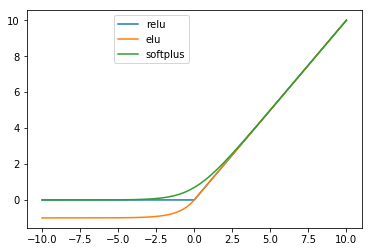

In [58]:
# Set the following lines
relu = tf.nn.relu(x) # ___ YOUR CODE HERE ____
elu = tf.nn.elu(x) # ___ YOUR CODE HERE ____
softplus = tf.nn.softplus(x) # ___ YOUR CODE HERE ____

with tf.Session() as sess:
    _relu, _elu, _softplus = sess.run([relu, elu, softplus])
    plt.plot(_x, _relu, label='relu')
    plt.plot(_x, _elu, label='elu')
    plt.plot(_x, _softplus, label='softplus')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.show()

Q2. Apply sigmoid and tanh to x using tf.nn.sigmoid() and tf.nn.tanh()

In [59]:
_x = np.linspace(-10., 10., 1000)
x = tf.convert_to_tensor(_x)

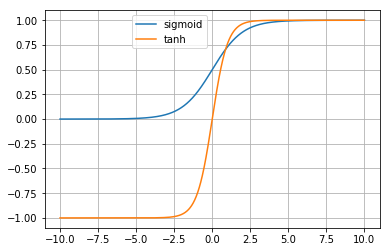

In [60]:
sigmoid = tf.nn.sigmoid(x) # ___ YOUR CODE HERE ____
tanh = tf.nn.tanh(x) # ___ YOUR CODE HERE ____

with tf.Session() as sess:
    _sigmoid, _tanh = sess.run([sigmoid, tanh])
    plt.plot(_x, _sigmoid, label='sigmoid')
    plt.plot(_x, _tanh, label='tanh')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.grid()
    plt.show()

Q3. Apply softmax to x. Assertion should pass if you did this correctly

In [61]:
_x = np.array([[1, 2, 4, 8], [2, 4, 6, 8]], dtype=np.float32)
x = tf.convert_to_tensor(_x)
# Apply softmax to x and set tensor as out
out = tf.nn.softmax(x) # ___ YOUR CODE HERE ____
with tf.Session() as sess:
    _out = sess.run(out)
    print(_out)    
    assert np.allclose(np.sum(_out, axis=-1), 1)

[[8.9250901e-04 2.4260911e-03 1.7926522e-02 9.7875494e-01]
 [2.1440089e-03 1.5842201e-02 1.1705890e-01 8.6495483e-01]]


Q4. Apply a fully connected layer to x with 2 outputs and then an sigmoid function. We provide the prepared contrib fully_connected layer

In [63]:
x = tf.random_normal([8, 10])
# replace ... with  the correct parameters. Shift+tab in jupyter notebooks reveal what the params are
out = tf.contrib.layers.fully_connected(x, 3) # ___ YOUR CODE HERE ____
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(out))

[[0.         1.6214542  0.        ]
 [0.         1.1874791  0.41924092]
 [0.         0.5946138  0.        ]
 [0.         0.6325521  0.        ]
 [0.         0.         0.75900936]
 [0.         1.1910896  0.95128965]
 [3.4743092  0.         0.        ]
 [0.20625663 1.0669801  0.72331387]]
